(aro_lot_sizing:title)=
# Adaptive Robust Lot-Sizing

In this example, we delve into a lot-sizing problem outlined in {cite:ps}`Bertsimas_De2016duality`. In a network comprising $N$ stores, the stock allocation decision $x_i$ for each store $i$ is made before the realization of the demand at each location is known. The demand, represented by the vector $\pmb{d}$, is uncertain and assumed to fall within a budgeted uncertainty set expressed as

$$
\mathcal{U} = \left\{
\pmb{d}: \pmb{0} \leq \pmb{d} \leq \pmb{1}d_{\max}
\right\}.
$$

Upon observing the realization of random demand, stock $y_{ij}$ may be transported from store $i$ to store $j$ at a cost of $t_{ij}$, with the aim of satisfying all demand. The objective is to minimize the worst-case total cost, encompassing the storage cost (with a unit cost of $c_i$ for each store $i$) and the expenses associated with shifting products between stores. This adaptive robust model can be then formulated as:

$$
\begin{align}
\min~&\max\limits_{\pmb{d}\in\mathcal{U}}~\sum\limits_{i=1}^Nc_ix_i + \sum\limits_{i=1}^N\sum\limits_{j=1}^Nt_{ij}y_{ij}(\pmb{d}) \\
\text{s.t.}~&\min\limits_{\pmb{d}\in\mathcal{U} }\left(\sum\limits_{j=1}^Ny_{ji}(\pmb{d}) - \sum\limits_{j=1}^Ny_{ij}(\pmb{d}) + x_i\right) \geq d_i &&i=1, 2, ..., N\\
&\min\limits_{\pmb{d}\in\mathcal{U} }y_{ij}(\pmb{d})\geq 0,  &&i=1, 2, ..., N \text{ and } j=1, 2, ..., N\\
&0\leq x_i \leq K_i &&i = 1, 2, ..., N,
\end{align}
$$

with $K_i$ to be the maximum stock capacity at each location, and the adaptive decision $y_{ij}$ to be approximated by the linear decision rule

$$
y_{ij}(\pmb{d}) = y_{ij}^0 + \sum\limits_{k=1}^Ny_{ijk}^d d_k,
$$

in other words, $y_{ij} \in \mathcal{L}([N])$ as the decision affinely adapts to all random demands $d_k$, where $k=1, 2, ..., N$. In the following case studies, we pick $N=30$ locations generated uniformly at random from $[0, 10]^2$. The shifting cost $t_{ij}$ is calculated as the Euclidean distance between store $i$ and store $j$, and the storage cost $c_i$ at each location is assumed to be $20$. The maximum demand $d_{\max}$ and the stock capacity $K_i$ at all locations are both set to be $20$ units, and the uncertainty budget parameter $\Gamma$ is set to $20\sqrt{N}$. These parameters are defined in the code segment below.

In [1]:
import numpy as np

N = 30                                              # the total number of locations
c = 20 * np.ones(N)                                 # the stoarage cost at each location
K = 20 * np.ones(N)                                 # The maximum stock capacity 
dmax = 20                                           # The maximum demand 
Gamma = 20*np.sqrt(N)                               # budget of uncertainty parameter  

np.random.seed(1)
xy = 10*np.random.rand(2, N)                        # randomly generated locations in a 2D space
t = ((xy[[0]] - xy[[0]].T) ** 2 +
     (xy[[1]] - xy[[1]].T) ** 2) ** 0.5             # the shifting costs as the Euclidean distances

In the code below, the lot-sizing problem is formulated as the aforementioned adjusted robust optimization model and solved by the default solver.

In [2]:
from rsome import ro

model = ro.Model()                                  # create an RSOME model

d = model.rvar(N)                                   # define random demand as variable d
uset = (0 <= d, d <= dmax,
        sum(d) <= Gamma)                            # define the budgeted uncertainty set uset

x = model.dvar(N)                                   # define the here-and-now storage decision x 
y = model.ldr((N, N))                               # define the wait-and-see shifting decision y
y.adapt(d)                                          # the decision rule that y affinely depends on d

model.minmax(c@x + (t*y).sum(), uset)               # the worst-case objective and uncertainty set
model.st(y.sum(axis=0) - y.sum(axis=1) + x >= d)    # the constraints of satisfying demand
model.st(y >= 0)                                    # the non-negative constraints of y
model.st(0 <= x, x <= K)                            # the bounds of storage allocation x

model.solve()                                       # solve the model with the default solver

Being solved by the default LP solver...
Solution status: 0
Running time: 6.1220s


The solution is illustrated by the following figure, where the white circles represent storage locations, and the sizes of the shaded bubbles indicate the optimal stock capacity $x_i$ at each storage location.

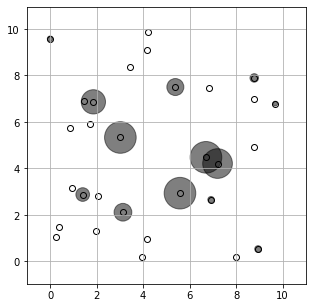

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(xy[0], xy[1], c='w', edgecolors='k')
plt.scatter(xy[0], xy[1], s=50*x.get(), c='k', alpha=0.5)
plt.axis('equal')
plt.xlim([-1, 11])
plt.ylim([-1, 11])
plt.grid()
plt.show()

<br>

---

<font size="5">Reference</font>

```{bibliography}
:filter: docname in docnames
```